In [2]:
# Import all the modules
import pandas as pd
from rdkit.Chem import Descriptors
from rdkit import Chem
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from rdkit.Chem import AllChem

In [3]:
# Load the dataset
tox_df = pd.DataFrame()
tox_df = pd.read_csv("tox21_with_smiles.csv")

In [4]:
# See top 5 rows
tox_df.head()

,Unnamed: 0,index,ID,inchikey,sdftitle,order,set,CVfold,NR.AhR,NR.AR,...,NR.Aromatase,NR.ER,NR.ER.LBD,NR.PPAR.gamma,SR.ARE,SR.ATAD5,SR.HSE,SR.MMP,SR.p53,smiles
0,0,0,NCGC00178831-03,PEJLNXHANOHNSU-UHFFFAOYSA-N,NCGC00178831-03,0,training,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.Nc1ccc2cc3ccc(N...
1,1,1,NCGC00166114-03,SEACYXSIPDVVMV-UHFFFAOYSA-L,NCGC00166114-03,1,training,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(...
2,2,2,NCGC00263563-01,WQGJEAMPBSZCIF-VEKNOCPUSA-N,NCGC00263563-01,2,training,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,CO[C@@H]1[C@@H](OC)[C@H](C)[C@@](O)(CC(=O)[O-]...
3,3,3,NCGC00013058-02,CNYGFPPAGUCRIC-UHFFFAOYSA-L,NCGC00013058-02,3,training,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)c...
4,4,4,NCGC00167516-01,LYCYLGFSIXIXAB-NUZRHMIVSA-N,NCGC00167516-01,4,training,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(=O)O.CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=...


In [5]:
# Get num of rows and columns
print(tox_df.shape)

(11759, 21)


In [6]:
# Test dataset
print(tox_df["NR.AhR"])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
11754    0.0
11755    0.0
11756    0.0
11757    1.0
11758    0.0
Name: NR.AhR, Length: 11759, dtype: float64


In [7]:
# How to assess toxicity??

# NR.AhR: Can indicate systemic toxicity and cancer risk.
# NR.AR and NR.AR.LBD: Related to endocrine disruption and reproductive toxicity.
# NR.Aromatase: Can indicate hormonal imbalances and reproductive effects.
# NR.ER and NR.ER.LBD: Associated with endocrine disruption and risk of hormone-related cancers.
# NR.PPAR.gamma: Involved in metabolic toxicity.
# SR.ARE: Marker for oxidative stress and organ-specific toxicity.
# SR.ATAD5: Indicates DNA damage and potential carcinogenicity.
# SR.HSE: Associated with cellular stress and cytotoxicity.
# SR.MMP: Related to tissue damage and organ dysfunction.
# SR.p53: Strong indicator of genotoxicity and cancer risk.



In [8]:
# Example: Load your dataset into a pandas DataFrame
# tox_df = pd.read_csv('tox21_data.csv')

# Define the columns related to toxicological concern
toxic_columns = [
    'NR.AhR',         # Aryl hydrocarbon receptor
    'NR.AR',          # Androgen receptor
    'NR.AR.LBD',      # Androgen receptor Ligand Binding Domain
    'NR.Aromatase',   # Aromatase
    'NR.ER',          # Estrogen receptor
    'NR.ER.LBD',      # Estrogen receptor Ligand Binding Domain
    'NR.PPAR.gamma',  # Peroxisome proliferator-activated receptor gamma
    'SR.ARE',         # Antioxidant response element
    'SR.ATAD5',       # DNA damage response (possibly unsafe if active)
    'SR.HSE',         # Heat shock element
    'SR.MMP',         # Matrix metalloproteinases
    'SR.p53'          # Tumor suppressor p53 (possibly unsafe if active)
]
     
print(tox_df[toxic_columns])


       NR.AhR  NR.AR  NR.AR.LBD  NR.Aromatase  NR.ER  NR.ER.LBD  \
0         NaN    NaN        NaN           NaN    NaN        NaN   
1         NaN    NaN        NaN           NaN    NaN        NaN   
2         NaN    NaN        NaN           NaN    NaN        NaN   
3         NaN    NaN        NaN           NaN    NaN        NaN   
4         NaN    0.0        NaN           NaN    NaN        NaN   
...       ...    ...        ...           ...    ...        ...   
11754     0.0    0.0        0.0           0.0    0.0        0.0   
11755     0.0    0.0        0.0           0.0    0.0        0.0   
11756     0.0    0.0        0.0           0.0    0.0        0.0   
11757     1.0    0.0        0.0           0.0    0.0        0.0   
11758     0.0    0.0        0.0           0.0    0.0        0.0   

       NR.PPAR.gamma  SR.ARE  SR.ATAD5  SR.HSE  SR.MMP  SR.p53  
0                NaN     NaN       NaN     0.0     NaN     NaN  
1                NaN     NaN       NaN     0.0     NaN     NaN  


In [9]:
# Count the number of empty values 

empty_dict = {}
empty_counter = 0

for i in toxic_columns:
    empty_counter = 0
    for j in tox_df[i]:
        if not j:
            empty_counter+=1
    empty_dict[i] = empty_counter

print(empty_dict)

{'NR.AhR': 7215, 'NR.AR': 8978, 'NR.AR.LBD': 8292, 'NR.Aromatase': 6862, 'NR.ER': 6757, 'NR.ER.LBD': 8303, 'NR.PPAR.gamma': 7958, 'SR.ARE': 6068, 'SR.ATAD5': 8749, 'SR.HSE': 7719, 'SR.MMP': 6175, 'SR.p53': 8093}


In [10]:

# Define a threshold for safety
# In this example, if any of the toxic columns is activated (i.e., has a value of 1),
# we classify the chemical as unsafe (0). Otherwise, it's safe (1).

# Create a new column 'safe_for_body' where:
# - If any of the toxicity-related assays are positive (1), it's unsafe (0).
# - If all are negative (0), it's safe (1).

# tox_df['safe_for_body'] = tox_df[toxic_columns].apply(lambda row: 0 if row.any() else 1, axis=1)

tox_inpute = tox_df.dropna(subset=toxic_columns)
tox_inpute['safe_for_body'] = tox_inpute[toxic_columns].apply(lambda row: 0 if row.any() else 1, axis=1)

# Print the first few rows to check
safe_count = 0

for i in tox_inpute["safe_for_body"]:
    if i == 1:
        safe_count+=1

print("number of chemical that is safe:", len(tox_inpute["safe_for_body"]))
print("number of chemical that is not safe: ", len(tox_inpute["safe_for_body"]) - safe_count)
print("Total number of chemical: ", safe_count)

number of chemical that is safe: 2542
number of chemical that is not safe:  373
Total number of chemical:  2169


C:\Users\willi\AppData\Local\Temp\ipykernel_11612\2270776002.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_inpute['safe_for_body'] = tox_inpute[toxic_columns].apply(lambda row: 0 if row.any() else 1, axis=1)


In [11]:
# Add new features
# Molecular weight
# Count the occurrences of each amino acid
# Count the total number of atoms, including carbon (C), hydrogen (H), oxygen (O), nitrogen (N), sulfur (S), etc.
# Count the number of aromatic rings
# logP
# ph, charge?
# number of hydrogen, covalent bond, diff bonds

def desc_calc(mol):
    mw = Descriptors.MolWt(mol)
    nn = 0
    
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 7:
            nn+=1
            
    nring = Descriptors.RingCount(mol)
    logP = Descriptors.MolLogP(mol)
    
    desc = {
    "mw":mw,
    "nn":nn,
    "nring":nring,
    "logP":logP,
    }
    
    return desc



In [12]:
# load smiles

mw_list = []
nn_list = []
nring_list = []
logP_list = []

for smi in tox_inpute["smiles"]:
    mol = Chem.MolFromSmiles(smi)
    desc = desc_calc(mol)
    
    mw_list.append(desc["mw"])
    nn_list.append(desc["nn"])
    nring_list.append(desc["nring"])
    logP_list.append(desc["logP"])
    
tox_inpute["mw"] = mw_list
tox_inpute["nn"] = nn_list
tox_inpute["nring"] = nring_list
tox_inpute["logP"] = logP_list

tox_inpute.head()
     

C:\Users\willi\AppData\Local\Temp\ipykernel_11612\527937087.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_inpute["mw"] = mw_list
C:\Users\willi\AppData\Local\Temp\ipykernel_11612\527937087.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_inpute["nn"] = nn_list
C:\Users\willi\AppData\Local\Temp\ipykernel_11612\527937087.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Unnamed: 0,index,ID,inchikey,sdftitle,order,set,CVfold,NR.AhR,NR.AR,...,SR.ATAD5,SR.HSE,SR.MMP,SR.p53,smiles,safe_for_body,mw,nn,nring,logP
7292,7292,7295,NCGC00258093-01,MEHHPFQKXOUFFV-OWSLCNJRSA-N,NCGC00258093-01,7295,training,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,C[C@]12C=CC3=C4CCC(=O)C=C4CC[C@H]3[C@@H]1CC[C@...,0,270.372,0,4,3.3293
7455,7455,7458,NCGC00258721-01,YIYBRXKMQFDHSM-UHFFFAOYSA-N,NCGC00258721-01,7458,training,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,O=C(c1ccccc1O)c1ccccc1O,0,214.220,0,2,2.3288
7469,7469,7472,NCGC00258764-01,NPAGDVCDWIYMMC-IZPLOLCNSA-N,NCGC00258764-01,7472,training,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@H]43)[C...,0,274.404,0,4,3.4891
7794,7794,7798,NCGC00254768-01,UELITFHSCLAHKR-UHFFFAOYSA-N,NCGC00254768-01,7798,training,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,CSC(=O)c1cccc2nnsc12,1,210.283,2,2,2.1945
7868,7868,7872,NCGC00256389-01,WBLZUCOIBUDNBV-UHFFFAOYSA-N,NCGC00256389-01,7872,training,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,O=C(O)CC[N+](=O)[O-],1,119.076,1,0,-0.2622


In [13]:
fps = []

for smi in tox_inpute["smiles"]:
    mol = Chem.MolFromSmiles(smi)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,256)
    fps.append(fp)

fp_mtx = np.array(fps)
print(fp_mtx)

[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerat

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerator
[10:56:21] DEPRECATION WARNING: please use MorganGenerat

In [14]:
# the matrix can be added to the original dataframe using the following line.
fp_mtx = np.array(fps)

# Generate column names for the fingerprint columns
fp_columns = ['fp_' + str(i) for i in range(256)]

tox_fp_inpute = tox_inpute

# Directly assign the fingerprint matrix as new columns in the DataFrame
tox_fp_inpute[fp_columns] = fp_mtx

C:\Users\willi\AppData\Local\Temp\ipykernel_11612\599202370.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_fp_inpute[fp_columns] = fp_mtx
C:\Users\willi\AppData\Local\Temp\ipykernel_11612\599202370.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tox_fp_inpute[fp_columns] = fp_mtx
C:\Users\willi\AppData\Local\Temp\ipykernel_11612\599202370.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [15]:
tox_inpute.to_csv("processed_tox.csv", index=False)

tox_inpute.head()

,Unnamed: 0,index,ID,inchikey,sdftitle,order,set,CVfold,NR.AhR,NR.AR,...,fp_246,fp_247,fp_248,fp_249,fp_250,fp_251,fp_252,fp_253,fp_254,fp_255
7292,7292,7295,NCGC00258093-01,MEHHPFQKXOUFFV-OWSLCNJRSA-N,NCGC00258093-01,7295,training,4.0,0.0,1.0,...,0,0,1,0,1,1,0,1,0,0
7455,7455,7458,NCGC00258721-01,YIYBRXKMQFDHSM-UHFFFAOYSA-N,NCGC00258721-01,7458,training,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7469,7469,7472,NCGC00258764-01,NPAGDVCDWIYMMC-IZPLOLCNSA-N,NCGC00258764-01,7472,training,1.0,0.0,1.0,...,0,0,1,0,1,1,0,1,0,0
7794,7794,7798,NCGC00254768-01,UELITFHSCLAHKR-UHFFFAOYSA-N,NCGC00254768-01,7798,training,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7868,7868,7872,NCGC00256389-01,WBLZUCOIBUDNBV-UHFFFAOYSA-N,NCGC00256389-01,7872,training,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
x_columns = ['mw',
             'nn',
             'nring',
             'logP']

In [17]:
# Preprocess the dataset
# x is new preprocess data, mw, nn, nring so on..
# y is the toxicity columns

x = tox_inpute.loc[:, x_columns].to_numpy()
y = tox_inpute.loc[:, 'safe_for_body'].to_numpy()

print("x shape: ", x.shape, "y_shape: ", y.shape)

x shape:  (2542, 4) y_shape:  (2542,)


In [18]:
# Split the dataset 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3300, train_size = 0.70, test_size= 0.30)

In [19]:
# Build the model
# start with logistic regression

log_reg_1 = LogisticRegression(solver='saga',max_iter=10000)
log_reg_1.fit(x_train,y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [20]:
# Test the accuracy of the set

y_pred = log_reg_1.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print("The accuracy of the prediction is {}".format(acc))

The accuracy of the prediction is 0.8401048492791612


In [21]:
from sklearn.metrics import mean_squared_error

##partition the data into training and validation randomly and plot the learning curve
# learning curve with increasing number of examples will help us evaluate the model behavior.

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=3300)
    train_errors = []
    val_errors=[]
    for m in range(3,len(x_train)):
        model.fit(X_train[:m,], y_train[:m])
        y_train_predict=model.predict(X_train)
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.axis([1,len(X_train),0,4])
    plt.plot(np.sqrt(train_errors),"r-+", label="train")
    plt.plot(np.sqrt(val_errors),"b-", label="val")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, accuracy_score, mean_squared_error


def getAccuracy(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(cm)

    r2 = r2_score(y_test, y_pred)
    print(f'R²: {r2:.2f}')

    MSE = mean_squared_error(y_test,y_pred)
    print("The mean squared error of yield prediction is ", MSE)

    # Display the classificatio n report
    cr = classification_report(y_test, y_pred)
    print('Classification Report:')
    print(cr)

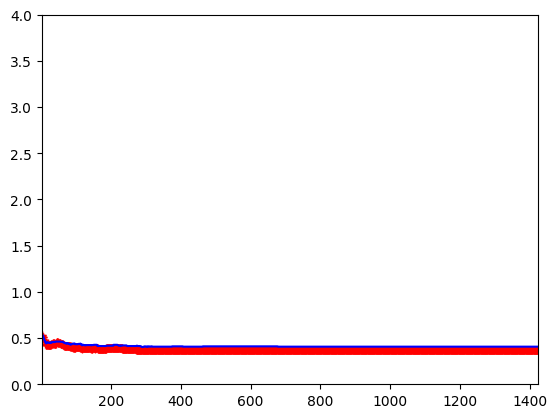

In [23]:
# Check the logistic learning curve

log_reg_2 = LogisticRegression()
log_reg_2.fit(x_test, y_test)

plot_learning_curves(log_reg_2, x_train, y_train)

In [24]:
# Test the accuracy of the set

y_pred = log_reg_2.predict(x_test)

getAccuracy(y_test, y_pred)

Accuracy: 0.84
Confusion Matrix:
[[  2 120]
 [  2 639]]
R²: -0.19
The mean squared error of yield prediction is  0.1598951507208388
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.03       122
           1       0.84      1.00      0.91       641

    accuracy                           0.84       763
   macro avg       0.67      0.51      0.47       763
weighted avg       0.79      0.84      0.77       763

Accuracy: 0.84


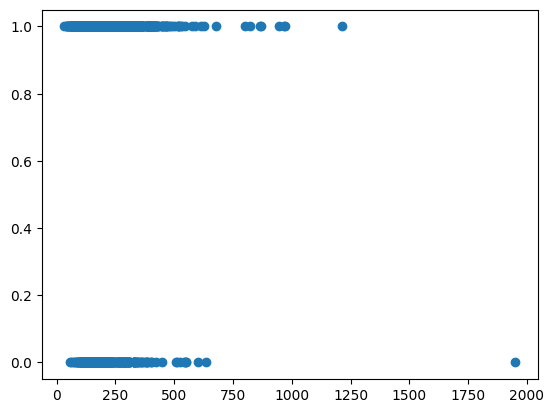

In [25]:
plt.scatter(x_train[:, 0], y_train)

In [26]:
tox_fp_inpute.head()

,Unnamed: 0,index,ID,inchikey,sdftitle,order,set,CVfold,NR.AhR,NR.AR,...,fp_246,fp_247,fp_248,fp_249,fp_250,fp_251,fp_252,fp_253,fp_254,fp_255
7292,7292,7295,NCGC00258093-01,MEHHPFQKXOUFFV-OWSLCNJRSA-N,NCGC00258093-01,7295,training,4.0,0.0,1.0,...,0,0,1,0,1,1,0,1,0,0
7455,7455,7458,NCGC00258721-01,YIYBRXKMQFDHSM-UHFFFAOYSA-N,NCGC00258721-01,7458,training,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7469,7469,7472,NCGC00258764-01,NPAGDVCDWIYMMC-IZPLOLCNSA-N,NCGC00258764-01,7472,training,1.0,0.0,1.0,...,0,0,1,0,1,1,0,1,0,0
7794,7794,7798,NCGC00254768-01,UELITFHSCLAHKR-UHFFFAOYSA-N,NCGC00254768-01,7798,training,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7868,7868,7872,NCGC00256389-01,WBLZUCOIBUDNBV-UHFFFAOYSA-N,NCGC00256389-01,7872,training,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\willi\

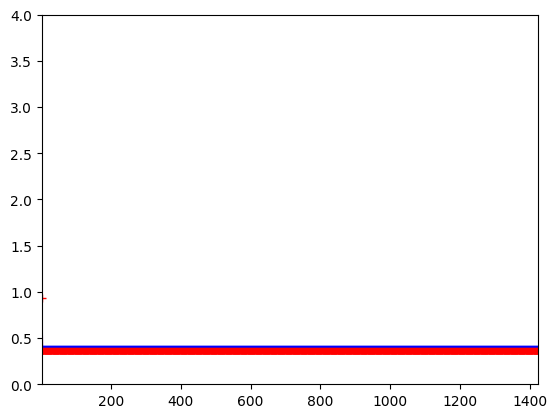

In [27]:
# With morgan fingerprint

x_columns = ['mw',
             'nn',
             'nring',
             'logP']

for i in range(256):
    x_columns.append("fp_"+str(i))

log_reg_3 = LogisticRegression(solver="saga")

x = tox_fp_inpute.loc[:, x_columns].to_numpy()
y = tox_fp_inpute.loc[:, 'safe_for_body'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3300, train_size = 0.70, test_size= 0.30)

plot_learning_curves(log_reg_3, x_train, y_train)

In [28]:
# Predicting with morgan fingerprint

y_pred = log_reg_3.predict(x_test)

getAccuracy(y_test, y_pred)

Accuracy: 0.84
Confusion Matrix:
[[  0 122]
 [  0 641]]
R²: -0.19
The mean squared error of yield prediction is  0.1598951507208388
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       122
           1       0.84      1.00      0.91       641

    accuracy                           0.84       763
   macro avg       0.42      0.50      0.46       763
weighted avg       0.71      0.84      0.77       763

Accuracy: 0.84


C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\willi\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [29]:
# Randomforestclassifier

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

getAccuracy(y_test, y_pred)

Accuracy: 0.85
Confusion Matrix:
[[ 16 106]
 [  8 633]]
R²: -0.11
The mean squared error of yield prediction is  0.14941022280471822
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.13      0.22       122
           1       0.86      0.99      0.92       641

    accuracy                           0.85       763
   macro avg       0.76      0.56      0.57       763
weighted avg       0.83      0.85      0.81       763

Accuracy: 0.85


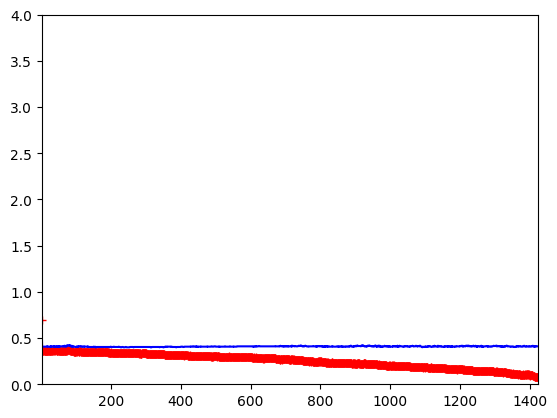

In [36]:
plot_learning_curves(rf_model, x_train, y_train)

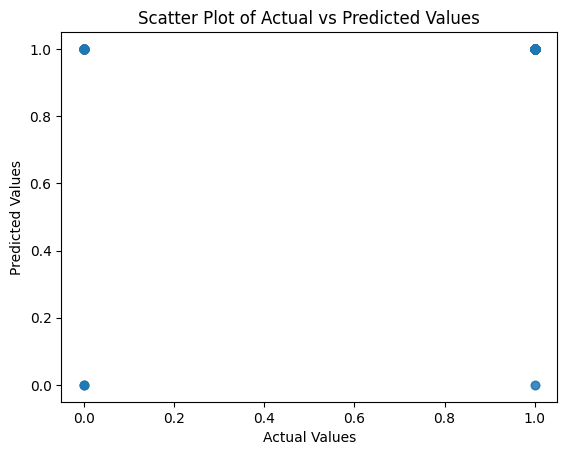

In [37]:
plt.scatter(y_test, y_pred,alpha=0.2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

In [ ]:
# WIPP

In [30]:
# Load the enzymes that are important to check similarity to drug WIPP
from Bio.PDB import PDBParser

def extract_active_site(pdb_filename, site_residues):
    """Extract coordinates of the active site residues."""
    coord = []
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_filename)
    model = structure[0]
    
    for chain in model:
        for residue in chain:
            if residue in site_residues:
                for atom in residue.get_atoms():
                    coord.append((atom.get_name(), atom.coord))
    
    return coord


In [31]:
from Bio.PDB import PDBParser, NeighborSearch, Selection
from Bio import PDB

def get_active_site_residues(pdb_filename, ligand_resname, cutoff=5.0):
    """Identify residues around a specific ligand within a cutoff."""
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_filename)
    model = structure[0]  # Single model in the structure (common in X-ray data)
    ligand_atoms = []
    site_residues = set()

    # First, find the ligand atoms
    for chain in model:
        for residue in chain:
            if residue.get_resname() == ligand_resname:
                ligand_atoms.extend(residue.get_atoms())

    if not ligand_atoms:
        print(f"No ligand with resname {ligand_resname} found in the structure.")
        return []

    # Now find protein residues within the cutoff distance
    for chain in model:
        for residue in chain:
            if PDB.is_aa(residue):  # Only consider amino acid residues
                for atom in residue.get_atoms():
                    for ligand_atom in ligand_atoms:
                        distance = atom - ligand_atom  # Calculate distance
                        if distance < cutoff:
                            site_residues.add(residue)
                            break  # No need to check more atoms in this residue

    return list(site_residues)

In [32]:
pdb_filename = '4tkx.pdb'
ligand_resname = 'SO4'  # You may need to adjust this
cutoff = 5.0

site_residues = get_active_site_residues(pdb_filename, ligand_resname, cutoff)
print("Active Site Residues:", [res.get_resname() + str(res.get_id()[1]) for res in site_residues])

coord = extract_active_site(pdb_filename, site_residues)
print("Coordinates of Active Site Residues:", coord)

Active Site Residues: ['SER669', 'PRO424', 'ARG597', 'GLY427', 'ASN569', 'SER430', 'ASP229', 'GLU547', 'TYR671', 'THR426', 'ALA423', 'HIS566', 'THR565', 'TYR429', 'TYR231', 'ASN670', 'GLN459', 'TYR425', 'HIS431', 'VAL230', 'CYS428', 'LYS601', 'ILE570']
Coordinates of Active Site Residues: [('N', array([  9.083,   8.293, -18.738], dtype=float32)), ('CA', array([  9.661,   8.587, -20.046], dtype=float32)), ('C', array([ 11.162,   8.28 , -20.028], dtype=float32)), ('O', array([ 11.668,   7.722, -19.059], dtype=float32)), ('CB', array([  9.392,  10.046, -20.453], dtype=float32)), ('CG', array([ 10.044,  11.051, -19.521], dtype=float32)), ('OD1', array([ 10.882,  10.644, -18.697], dtype=float32)), ('OD2', array([  9.716,  12.26 , -19.626], dtype=float32)), ('HA', array([  9.243,   8.006, -20.716], dtype=float32)), ('HB2', array([  9.743,  10.194, -21.345], dtype=float32)), ('HB3', array([  8.436,  10.205, -20.443], dtype=float32)), ('N', array([ 11.864,   8.624, -21.103], dtype=float32)), (

In [33]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Convert SMILES to a RDKit molecule object
smiles = 'C=O'  # CO (carbon monoxide) SMILES representation
mol = Chem.MolFromSmiles(smiles)

# Add hydrogens and generate 3D coordinates
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.UFFOptimizeMolecule(mol)  # Optimize geometry

# Save the molecule as a PDB file for docking
with open('ligand.pdb', 'w') as f:
    f.write(Chem.MolToPDBBlock(mol))

In [34]:
from Bio.PDB import PDBParser, PDBIO, Select

# Define a class to select only protein chains (remove water, etc.)
class ProteinSelect(Select):
    def accept_residue(self, residue):
        return residue.id[0] == " "  # Only keep protein residues

# Load and clean the PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure('protease', '4tkx.pdb')

# Save the cleaned protein structure
io = PDBIO()
io.set_structure(structure)
io.save('clean_protease.pdb', ProteinSelect())

In [35]:
import subprocess

# Define the paths to the prepared protein and ligand files
protein_pdb = 'clean_protease.pdb'
ligand_pdb = 'ligand.pdb'

# Prepare the docking configuration
config = """
receptor = {}
ligand = {}
center_x = 0
center_y = 0
center_z = 0
size_x = 30
size_y = 30
size_z = 30
exhaustiveness = 8
""".format(protein_pdb, ligand_pdb)

with open('docking_config.txt', 'w') as f:
    f.write(config)

# Run AutoDock Vina for docking
subprocess.run(['vina', '--config', 'docking_config.txt', '--out', 'docked_output.pdbqt', '--log', 'docking_log.txt'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
def extract_binding_affinity(log_file):
    with open(log_file, 'r') as f:
        for line in f:
            if "REMARK VINA RESULT" in line:
                binding_affinity = float(line.split()[3])  # Extract the affinity value
                return binding_affinity

binding_affinity = extract_binding_affinity('docking_log.txt')
print(f"Binding Affinity: {binding_affinity} kcal/mol")

Binding Affinity: None kcal/mol


In [ ]:
import deepchem as dc

# Load a pre-trained toxicity model (Tox21 dataset)
model = dc.models.GraphConvModel(1, mode='classification')
model.restore('tox21_model')

# Use RDKit to convert SMILES to a molecular graph
from rdkit import Chem
from deepchem.feat import MolGraphConvFeaturizer

smiles = 'C=O'  # Carbon monoxide SMILES
mol = Chem.MolFromSmiles(smiles)

# Featurize the molecule for the model
featurizer = MolGraphConvFeaturizer()
X = featurizer.featurize([mol])

# Predict toxicity
toxicity_pred = model.predict(X)
print(f"Toxicity Prediction: {toxicity_pred}")

ModuleNotFoundError: No module named 'tensorflow'